In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("final_data.csv")
df.head()

,YearsWithCurrManager,EducationField,Age,YearsSinceLastPromotion,TotalWorkingYears,YearsAtCompany,MaritalStatus,StockOptionLevel,MonthlyIncome,JobSatisfaction,...,DistanceFromHome,JobRole,DailyRate,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,NumCompaniesWorked,JobLevel,Attrition,WorkLifeBalance
0,0.245834,-0.937414,0.446350,-0.679146,-0.421642,-0.164613,1.236820,-0.932014,-0.108350,1.153254,...,-1.010909,1.032716,0.742527,-2.171982,-0.660531,-0.063296,2.125136,-0.057788,1,-2.493820
1,0.806541,-0.937414,1.322365,-0.368715,-0.164511,0.488508,-0.133282,0.241988,-0.291719,-0.660853,...,-0.147150,0.626374,-1.297775,0.155707,0.254625,0.764998,-0.678049,-0.057788,0,0.338096
2,-1.155935,1.316673,0.008343,-0.679146,-0.550208,-1.144294,1.236820,-0.932014,-0.937654,0.246200,...,-0.887515,-0.998992,1.414363,0.155707,1.169781,-1.167687,1.324226,-0.961486,1,0.338096
3,-1.155935,-0.937414,-0.429664,0.252146,-0.421642,0.161947,-0.133282,-0.932014,-0.763634,0.246200,...,-0.764121,0.626374,1.461466,0.155707,1.169781,0.764998,-0.678049,-0.961486,0,0.338096
4,-0.595227,0.565311,-1.086676,-0.058285,-0.678774,-0.817734,-0.133282,0.241988,-0.644858,-0.660853,...,-0.887515,-0.998992,-0.524295,0.155707,-1.575686,-0.615492,2.525591,-0.961486,0,0.338096


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X=df.drop(columns='Attrition')
y=df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

In [ ]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]
accuracy = sum(y_pred_binary == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8707482993197279


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = bst.predict(X_train, num_iteration=bst.best_iteration)
y_pred_train_binary = [1 if p > 0.5 else 0 for p in y_pred_train]
training_accuracy = accuracy_score(y_train, y_pred_train_binary)
print('Training-set accuracy score: {0:0.4f}'.format(training_accuracy))

Training-set accuracy score: 0.9881


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = bst.predict(X_train, num_iteration=bst.best_iteration)
y_pred_train_binary = [1 if p > 0.5 else 0 for p in y_pred_train]
training_accuracy = accuracy_score(y_train, y_pred_train_binary)
print('Training set accuracy score: {:.4f}'.format(training_accuracy))
y_pred_test = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_test_binary = [1 if p > 0.5 else 0 for p in y_pred_test]
test_accuracy = accuracy_score(y_test, y_pred_test_binary)
print('Test set accuracy score: {:.4f}'.format(test_accuracy))


Training set accuracy score: 0.9881
Test set accuracy score: 0.8707


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]
cm = confusion_matrix(y_test, y_pred_binary)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])


Confusion matrix

 [[247   8]
 [ 30   9]]

True Positives(TP) =  247

True Negatives(TN) =  9

False Positives(FP) =  8

False Negatives(FN) =  30


<Axes: >

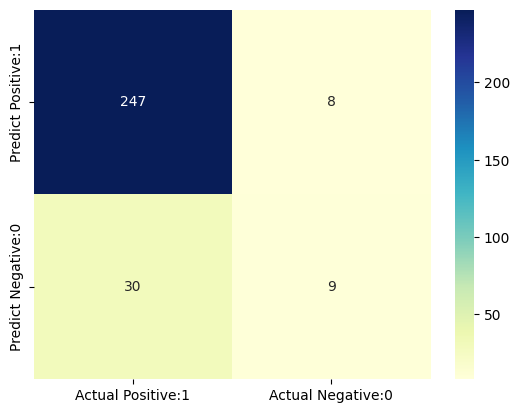

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]
report = classification_report(y_test, y_pred_binary)

print(report)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.53      0.23      0.32        39

    accuracy                           0.87       294
   macro avg       0.71      0.60      0.63       294
weighted avg       0.84      0.87      0.85       294

